In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Charger les données
file_path = 'dataset_modele_ia_2021.csv'
data = pd.read_csv(file_path)

In [2]:
# Nettoyage des données
cols_to_convert = ['Cambriolages de logement', 'Trafic de stupéfiants', 'Vols avec armes']
for col in cols_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

# calcul des features et de la cible
X = data.drop(columns=['Libelle_Commune', 'Code_Commune', 'Candidat_Max_Voix_T1_2022_Encoded', 'Nombre_Voix_Max_T1_2022'])
y = data['Candidat_Max_Voix_T1_2022_Encoded']

In [3]:
# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle de réseau de neurones
model_nn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes de sortie
])

# Compilation du modèle
model_nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)

# Prédiction et évaluation
y_pred = model_nn.predict(X_test)
y_pred = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

2/2 [==============================] - 0s 3ms/step
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.80      0.97      0.88        34
           2       0.00      0.00      0.00         1

    accuracy                           0.79        42
   macro avg       0.27      0.32      0.29        42
weighted avg       0.65      0.79      0.71        42



C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

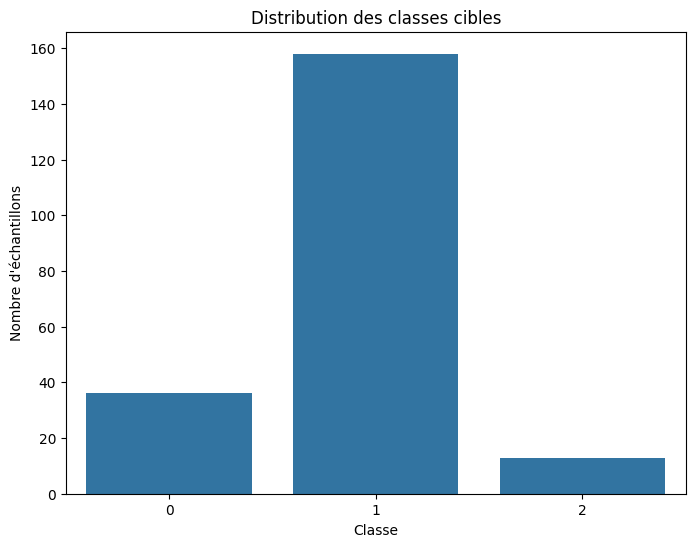

In [4]:
# 1. Distribution des classes cibles
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution des classes cibles')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

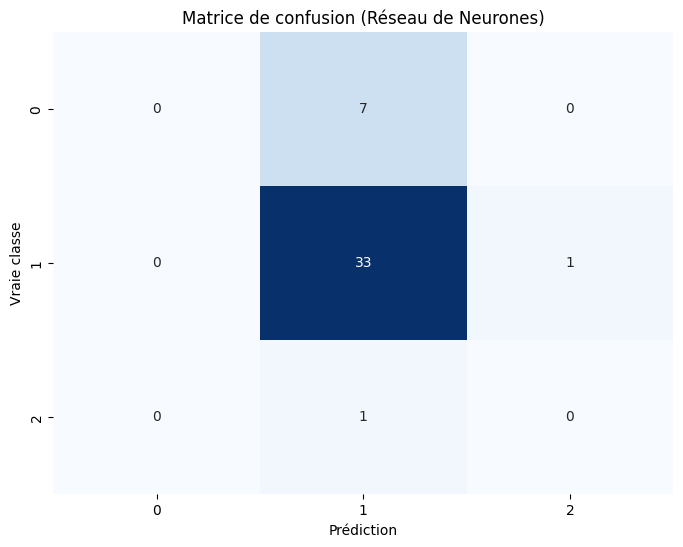

In [5]:
# 2. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Matrice de confusion (Réseau de Neurones)')
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.show()

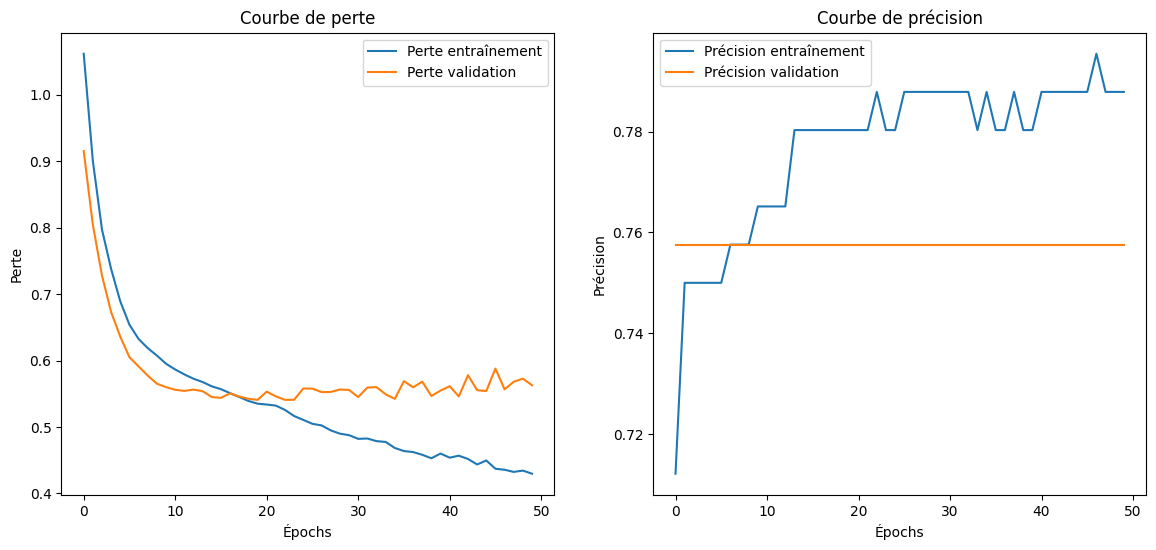

In [6]:
# 3. Courbe de perte et précision du modèle pendant l'entraînement
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Courbe de perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Courbe de précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()

plt.show()